# DW_pandas_Task4

## 20201223

DataWhale_pandas组队学习第四章，分组，加油！！！

### 分组模式及其对象

In [1]:
import pandas as pd
import numpy as np

In [2]:
df = pd.read_csv('../data/learn_pandas.csv')
df.groupby('Gender')['Height'].median()

Gender
Female    159.6
Male      173.4
Name: Height, dtype: float64

In [3]:
df.groupby(['School','Grade'])['Height'].mean()

School                         Grade    
Fudan University               Freshman     160.950000
                               Junior       161.433333
                               Senior       161.118182
                               Sophomore    168.183333
Peking University              Freshman     164.991667
                               Junior       162.314286
                               Senior       163.285714
                               Sophomore    158.640000
Shanghai Jiao Tong University  Freshman     165.683333
                               Junior       160.976471
                               Senior       165.390476
                               Sophomore    163.660000
Tsinghua University            Freshman     160.360000
                               Junior       164.880952
                               Senior       164.421429
                               Sophomore    162.200000
Name: Height, dtype: float64

In [4]:
condition = df.Weight > df.Weight.mean()
df.groupby(condition)['Height'].mean()

Weight
False    159.034646
True     172.705357
Name: Height, dtype: float64

In [5]:
condition

0      False
1       True
2       True
3      False
4       True
       ...  
195    False
196    False
197    False
198     True
199    False
Name: Weight, Length: 200, dtype: bool

这个应该怎么理解，身高超过均值的，condition是布尔值，那么依据这个分组，在平均身高以下的平均值为159.034646，在平均身高以上的平均值为172.705357,然后分组就是按False和Ture来分。

#### 【练一练】
请根据上下四分位数分割，将体重分为high、normal、low三组，统计身高的均值。

In [6]:
df.describe()

,Height,Weight,Test_Number
count,183.000000,189.000000,200.000000
mean,163.218033,55.015873,1.645000
std,8.608879,12.824294,0.722207
min,145.400000,34.000000,1.000000
25%,157.150000,46.000000,1.000000
50%,161.900000,51.000000,1.500000
75%,167.500000,65.000000,2.000000
max,193.900000,89.000000,3.000000


In [7]:
high = df.Weight > df.Weight.quantile(0.75)
normal_1 = df.Weight >= df.Weight.quantile(0.25)
normal_2 = df.Weight <= df.Weight.quantile(0.75)
normal = normal_1&normal_2
low = df.Weight < df.Weight.quantile(0.25)

In [8]:
df.groupby(high)['Height'].mean()

Weight
False    159.727660
True     174.935714
Name: Height, dtype: float64

In [9]:
df.groupby(normal)['Height'].mean()

Weight
False    164.538043
True     161.883516
Name: Height, dtype: float64

In [10]:
df.groupby(low)['Height'].mean()

Weight
False    165.950704
True     153.753659
Name: Height, dtype: float64

In [11]:
df.groupby(['Gender',normal])['Height'].mean()

Gender  Weight
Female  False     154.585106
        True      161.747059
Male    False     174.933333
        True      163.816667
Name: Height, dtype: float64

这样做问题能解决，感觉好象有些繁琐，最后一个加了分男女的平均值。

In [12]:
item = np.random.choice(['a','b','c','d'], df.shape[0])
df.groupby(item)['Height'].mean()

a    163.752381
b    163.142857
c    163.226000
d    162.761905
Name: Height, dtype: float64

In [13]:
df.groupby([condition, item])['Height'].mean()

Weight   
False   a    158.932143
        b    158.146875
        c    159.673529
        d    159.324242
True    a    173.392857
        b    172.547059
        c    170.775000
        d    175.366667
Name: Height, dtype: float64

In [14]:
df[['School', 'Gender']].drop_duplicates()

,School,Gender
0,Shanghai Jiao Tong University,Female
1,Peking University,Male
2,Shanghai Jiao Tong University,Male
3,Fudan University,Female
4,Fudan University,Male
5,Tsinghua University,Female
9,Peking University,Female
16,Tsinghua University,Male


这一部分没搞清楚，drop_duplicates是去重，但跟上面两个对应说明什么？是指上面分组都是去重后的结果吗？这应该和去重没关系吧，按大于平均体重的值和a,b,c,d进行分组，再取身高的平均值，然后求得结果，这跟去重有什么关系？

In [15]:
gb = df.groupby(['School', 'Grade'])
gb.ngroups

16

In [16]:
res = gb.groups
res.keys()

dict_keys([('Fudan University', 'Freshman'), ('Fudan University', 'Junior'), ('Fudan University', 'Senior'), ('Fudan University', 'Sophomore'), ('Peking University', 'Freshman'), ('Peking University', 'Junior'), ('Peking University', 'Senior'), ('Peking University', 'Sophomore'), ('Shanghai Jiao Tong University', 'Freshman'), ('Shanghai Jiao Tong University', 'Junior'), ('Shanghai Jiao Tong University', 'Senior'), ('Shanghai Jiao Tong University', 'Sophomore'), ('Tsinghua University', 'Freshman'), ('Tsinghua University', 'Junior'), ('Tsinghua University', 'Senior'), ('Tsinghua University', 'Sophomore')])

这个字典键值是不是可以用来计算第二章口袋妖怪的属性组合问题？

#### 【练一练】
上一小节介绍了可以通过`drop_duplicates`得到具体的组类别，现请用`groups`属性完成类似的功能。

In [17]:
gb = df.groupby(['School', 'Gender'])
gb.groups.keys()

dict_keys([('Fudan University', 'Female'), ('Fudan University', 'Male'), ('Peking University', 'Female'), ('Peking University', 'Male'), ('Shanghai Jiao Tong University', 'Female'), ('Shanghai Jiao Tong University', 'Male'), ('Tsinghua University', 'Female'), ('Tsinghua University', 'Male')])

In [18]:
a = [i[0] for i in pd.DataFrame([gb.groups.keys()]).T[0].to_list()]
b = [i[1] for i in pd.DataFrame([gb.groups.keys()]).T[0].to_list()]
aa = pd.DataFrame([a,b]).T
aa.columns=['School','Gender']
aa

,School,Gender
0,Fudan University,Female
1,Fudan University,Male
2,Peking University,Female
3,Peking University,Male
4,Shanghai Jiao Tong University,Female
5,Shanghai Jiao Tong University,Male
6,Tsinghua University,Female
7,Tsinghua University,Male


又做复杂了，不过对pandas的转换操作又有了不同的理解，感觉随意性还是很大，只要熟悉相关的参数及运用不同函数，可以做到不同的转换，当然，掌握简捷的方法更好。

In [19]:
gb.size()

School                         Gender
Fudan University               Female    30
                               Male      10
Peking University              Female    22
                               Male      12
Shanghai Jiao Tong University  Female    41
                               Male      16
Tsinghua University            Female    48
                               Male      21
dtype: int64

In [20]:
gb.get_group(('Fudan University', 'Female')).head()

,School,Grade,Name,Gender,Height,Weight,Transfer,Test_Number,Test_Date,Time_Record
3,Fudan University,Sophomore,Xiaojuan Sun,Female,NaN,41.0,N,2,2020/1/3,0:04:08
15,Fudan University,Freshman,Changqiang Yang,Female,156.0,49.0,N,3,2020/1/1,0:05:25
26,Fudan University,Junior,Yanli You,Female,NaN,48.0,N,1,2019/9/23,0:03:34
28,Fudan University,Freshman,Gaoqiang Qin,Female,170.2,63.0,N,2,2020/1/7,0:05:24
37,Fudan University,Sophomore,Xiaoquan Zhang,Female,158.3,45.0,N,2,2019/10/1,0:05:23


去百度了下：groupby 是pandas 中非常重要的一个函数, 应用非常灵活，主要用于数据聚合和分类计算. 其思想是“split-apply-combine”（拆分 - 应用 - 合并），以下这张图比较能清晰的说明。

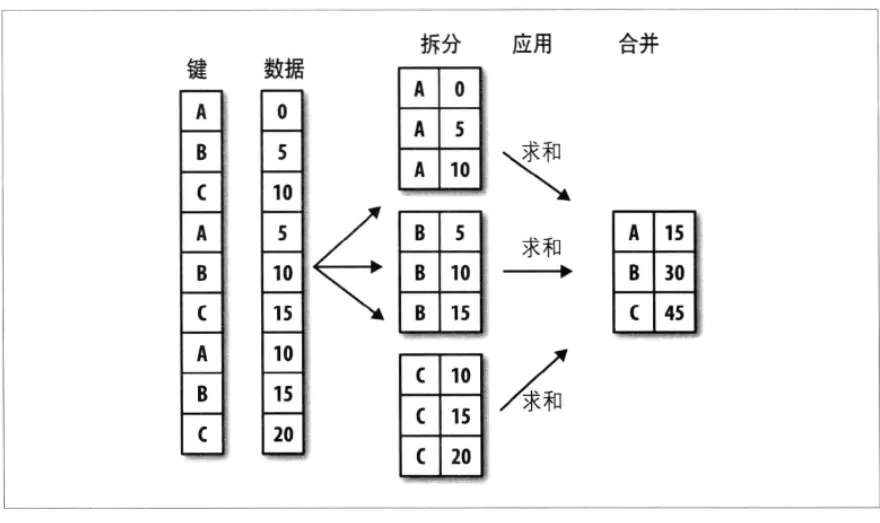

### 聚合函数

In [21]:
gb = df.groupby('Gender')['Weight']
gb.idxmin()

Gender
Female     49
Male      199
Name: Weight, dtype: int64

In [22]:
gb.quantile(0.95)

Gender
Female    56.0
Male      84.4
Name: Weight, dtype: float64

直接定义在groupby对象的聚合函数，因为它的速度基本都会经过内部的优化，使用功能时应当优先考虑。根据返回标量值的原则，包括如下函数：max/min/mean/median/count/all/any/idxmax/idxmin/mad/nunique/skew/quantile/sum/std/var/sem/size/prod。

#### 【练一练】
请查阅文档，明确`all/any/mad/skew/sem/prod`函数的含义。

In [23]:
gb.all()   #布尔简化，所有True则为True，一个False则为False。

Gender
Female    True
Male      True
Name: Weight, dtype: bool

In [24]:
gb.any()   #布尔简化，一个True则为True，所有False则为False。

Gender
Female    True
Male      True
Name: Weight, dtype: bool

In [25]:
gb.mad()   # 平均绝对偏差

Gender
Female    4.369602
Male      5.990398
Name: Weight, dtype: float64

In [26]:
gb.skew()   # 样本偏度 (第三阶)

Gender
Female   -0.268482
Male     -0.332393
Name: Weight, dtype: float64

In [27]:
gb.sem()   # 平均值的标准误差

Gender
Female    0.465273
Male      1.057711
Name: Weight, dtype: float64

In [28]:
gb.prod()   # 乘积

Gender
Female    3.039202e+226
Male      2.540227e+100
Name: Weight, dtype: float64

In [29]:
gb = df.groupby('Gender')[['Height', 'Weight']]
gb.max()

,Height,Weight
Gender,,
Female,170.2,63.0
Male,193.9,89.0


这些聚合函数当传入的数据来源包含多个列时，将按照列进行迭代计算

【a】使用多个函数

In [30]:
gb.agg(['sum', 'idxmax', 'skew'])

Height                   Weight                 
            sum idxmax      skew     sum idxmax      skew
Gender                                                   
Female  21014.0     28 -0.219253  6469.0     28 -0.268482
Male     8854.9    193  0.437535  3929.0      2 -0.332393

【b】对特定的列使用特定的聚合函数

In [31]:
gb.agg({'Height':['mean','max'], 'Weight':'count'})

Height        Weight
             mean    max  count
Gender                         
Female  159.19697  170.2    135
Male    173.62549  193.9     54

agg应用就这么简单吗？好象有坑

#### 【练一练】
请使用【b】中的传入字典的方法完成【a】中等价的聚合任务。

In [32]:
gb.agg({'Height':['sum', 'idxmax', 'skew'], 'Weight':['sum', 'idxmax', 'skew']})

Height                   Weight                 
            sum idxmax      skew     sum idxmax      skew
Gender                                                   
Female  21014.0     28 -0.219253  6469.0     28 -0.268482
Male     8854.9    193  0.437535  3929.0      2 -0.332393

【c】使用自定义函数

In [33]:
gb.agg(lambda x: x.mean()-x.min())

,Height,Weight
Gender,,
Female,13.79697,13.918519
Male,17.92549,21.759259


#### 【练一练】
在`groupby`对象中可以使用`describe`方法进行统计信息汇总，请同时使用多个聚合函数，完成与该方法相同的功能。

In [34]:
gb.describe()

Height                                                              \
        count       mean       std    min      25%    50%      75%    max   
Gender                                                                      
Female  132.0  159.19697  5.053982  145.4  155.675  159.6  162.825  170.2   
Male     51.0  173.62549  7.048485  155.7  168.900  173.4  177.150  193.9   

       Weight                                                      
        count       mean       std   min   25%   50%    75%   max  
Gender                                                             
Female  135.0  47.918519  5.405983  34.0  44.0  48.0  52.00  63.0  
Male     54.0  72.759259  7.772557  51.0  69.0  73.0  78.75  89.0

In [35]:
res = gb.agg({'Height':['count', 'mean', 'std', 'min', lambda x:x.quantile(0.25), 'quantile', lambda x:x.quantile(0.75), 'max'], 
              'Weight':['count', 'mean', 'std', 'min', lambda x:x.quantile(0.25), 'quantile', lambda x:x.quantile(0.75), 'max']})
res.rename(columns={'<lambda_0>':'25%', 'quantile':'50%', '<lambda_1>':'75%'})

Height                                                              \
        count       mean       std    min      25%    50%      75%    max   
Gender                                                                      
Female    132  159.19697  5.053982  145.4  155.675  159.6  162.825  170.2   
Male       51  173.62549  7.048485  155.7  168.900  173.4  177.150  193.9   

       Weight                                                      
        count       mean       std   min   25%   50%    75%   max  
Gender                                                             
Female    135  47.918519  5.405983  34.0  44.0  48.0  52.00  63.0  
Male       54  72.759259  7.772557  51.0  69.0  73.0  78.75  89.0

看上去差不多了，先尝试用lambda赋值给变量，再将变量传入列表，但在agg中不能识别，应该是自定义函数才可以，然后改为直接在列表中定义lambda，用是可以用了，但列索引名称自动生成\<lambda_0\>改不了，想找个直接解决的办法，百度了很久没解决这个问题，就只能改列索引名称了，每一步走下来都花了很长时间，基本是靠百度活着。

In [36]:
def my_func(s):
    res = 'High'
    if s.mean() <= df[s.name].mean():
        res = 'Low'
    return res
gb.agg(my_func)

,Height,Weight
Gender,,
Female,Low,Low
Male,High,High


突然间这个df[s.name]反应不过来，先放着，往下看

In [37]:
gb.agg([('range', lambda x: x.max()-x.min()), ('my_sum', 'sum')])

Height          Weight        
        range   my_sum  range  my_sum
Gender                               
Female   24.8  21014.0   29.0  6469.0
Male     38.2   8854.9   38.0  3929.0

In [38]:
gb.agg({'Height': [('my_func', my_func), 'sum'], 'Weight': lambda x:x.max()})

Height            Weight
       my_func      sum <lambda>
Gender                          
Female     Low  21014.0     63.0
Male      High   8854.9     89.0

In [39]:
gb.agg({'Height': [('my_func', my_func), 'sum'], 'Weight': [('range', lambda x:x.max())]})

Height          Weight
       my_func      sum  range
Gender                        
Female     Low  21014.0   63.0
Male      High   8854.9   89.0

In [40]:
gb.agg({'Height' : ['count', 'mean', 'std', 'min', ('25%', lambda x:x.quantile(0.25)), 
                   ('50%', 'quantile'), ('75%', lambda x:x.quantile(0.75)), 'max'], 
        'Weight' : ['count', 'mean', 'std', 'min', ('25%', lambda x:x.quantile(0.25)), 
                   ('50%', 'quantile'), ('75%', lambda x:x.quantile(0.75)), 'max']})

Height                                                              \
        count       mean       std    min      25%    50%      75%    max   
Gender                                                                      
Female    132  159.19697  5.053982  145.4  155.675  159.6  162.825  170.2   
Male       51  173.62549  7.048485  155.7  168.900  173.4  177.150  193.9   

       Weight                                                      
        count       mean       std   min   25%   50%    75%   max  
Gender                                                             
Female    135  47.918519  5.405983  34.0  44.0  48.0  52.00  63.0  
Male       54  72.759259  7.772557  51.0  69.0  73.0  78.75  89.0

好吧，我知道上面的时间又白费了，这就是我原来想要的结果，在百度上花了那么多时间，结果就在这两行。😂😂

### 变换和过滤

In [41]:
gb.cummax().head()

,Height,Weight
0,158.9,46.0
1,166.5,70.0
2,188.9,89.0
3,NaN,46.0
4,188.9,89.0


变换函数的返回值为同长度的序列，最常用的内置变换函数是累计函数：`cumcount/cumsum/cumprod/cummax/cummin`，它们的使用方式和聚合函数类似，只不过完成的是组内累计操作。

方法名	    函数功能

cumsum()	依次给出前1、2、… 、n个数的和

cumprod()	依次给出前1、2、… 、n个数的积

cummax()	依次给出前1、2、… 、n个数的最大值

cummin()	依次给出前1、2、… 、n个数的最小值

#### 【练一练】
在`groupby`对象中，`rank`方法也是一个实用的变换函数，请查阅它的功能并给出一个使用的例子。

In [42]:
gb = df.groupby(['School', 'Grade'])
gb.head()

,School,Grade,Name,Gender,Height,Weight,Transfer,Test_Number,Test_Date,Time_Record
0,Shanghai Jiao Tong University,Freshman,Gaopeng Yang,Female,158.9,46.0,N,1,2019/10/5,0:04:34
1,Peking University,Freshman,Changqiang You,Male,166.5,70.0,N,1,2019/9/4,0:04:20
2,Shanghai Jiao Tong University,Senior,Mei Sun,Male,188.9,89.0,N,2,2019/9/12,0:05:22
3,Fudan University,Sophomore,Xiaojuan Sun,Female,NaN,41.0,N,2,2020/1/3,0:04:08
4,Fudan University,Sophomore,Gaojuan You,Male,174.0,74.0,N,2,2019/11/6,0:05:22
...,...,...,...,...,...,...,...,...,...,...
120,Peking University,Sophomore,Peng Han,Female,147.8,34.0,NaN,2,2019/9/19,0:03:32
124,Shanghai Jiao Tong University,Sophomore,Chunpeng Shi,Female,152.9,44.0,N,1,2019/11/30,0:04:23
127,Peking University,Senior,Changquan Han,Male,173.4,77.0,N,1,2019/11/4,0:03:56
130,Peking University,Senior,Mei Feng,Female,NaN,51.0,N,3,2019/9/28,0:05:29


In [43]:
gb.rank(ascending=False).sort_values('Weight')

,Height,Weight,Test_Number
82,1.0,1.0,5.0
38,1.0,1.0,2.0
71,1.0,1.0,3.0
40,1.0,1.0,11.0
158,2.0,1.0,7.0
...,...,...,...
119,6.0,NaN,2.0
122,8.0,NaN,14.0
123,15.0,NaN,16.5
132,5.0,NaN,6.0


没找到真正解释清楚的内容，学的也有些莫名其妙，不浪费时间，再找吧

In [44]:
gb.transform(lambda x: (x-x.mean())/x.std()).head()

,Height,Weight,Test_Number
0,-0.795776,-0.938544,-0.613941
1,0.139903,0.571289,-0.924500
2,2.092570,1.901632,0.557239
3,NaN,-1.413830,0.724569
4,0.864435,1.025720,0.724569


#### 【练一练】
对于`transform`方法无法像`agg`一样，通过传入字典来对指定列使用特定的变换，如果需要在一次`transform`的调用中实现这种功能，请给出解决方案。

In [69]:
for i in ['mean', 'std', 'count']:
    print(gb.transform(i).head())

       Height     Weight  Test_Number
0  165.683333  59.833333     1.538462
1  164.991667  60.461538     1.769231
2  165.390476  59.850000     1.590909
3  168.183333  60.125000     1.625000
4  168.183333  60.125000     1.625000
      Height     Weight  Test_Number
0   8.524172  14.739146     0.877058
1  10.781251  16.696384     0.832050
2  11.234763  15.328937     0.734140
3   6.728868  13.527089     0.517549
4   6.728868  13.527089     0.517549
   Name  Gender  Height  Weight  Transfer  Test_Number  Test_Date  Time_Record
0    13      13      12      12        13           13         13           13
1    13      13      12      13        13           13         13           13
2    22      22      21      20        18           22         22           22
3     8       8       6       8         8            8          8            8
4     8       8       6       8         8            8          8            8


一知半解，以上这些方法缺少些说明，去百度搜索找到的内容不太符合，有没有系统化的参考书？搜索过滤太费时间了⏱🛴

In [80]:
gb = df.groupby('Gender')[['Height','Weight']]
gb.filter(lambda x: x.shape[0] > 100).head()

,Height,Weight
0,158.9,46.0
3,NaN,41.0
5,158.0,51.0
6,162.5,52.0
7,161.9,50.0


#### 【练一练】
从概念上说，索引功能是组过滤功能的子集，请使用`filter`函数完成`loc[...]`的功能，这里假设"`...`"是元素列表。 

In [104]:
gb.filter(lambda x:max(x['Height'])>150).head()

,Height,Weight
0,158.9,46.0
1,166.5,70.0
2,188.9,89.0
3,NaN,41.0
4,174.0,74.0


头晕😣，已经完全捋不清楚了，学到那算到那吧，年末碎片化的时间无法集中精力，越往后所需的时间越多，花在查找上的时间多于学习的时间，感觉很浪费😫，学习的时候看着时间，太赶了，没效果。

努力跟完全程，想要把这些吸收至少得几个月时间吧！